# Import Libararies

In [1]:
import pandas as pd
import json
import numpy as np
import operator
import matplotlib.pyplot as plt
from collections import Counter
import os

# Load Data

In [2]:
# loading the events data
events={}
nations = ['Italy','England','Germany','France','Spain','European_Championship','World_Cup']
for nation in nations:
    with open('./DataJson/events/events_%s.json' %nation) as json_data:
        events[nation] = json.load(json_data)
        
# loading the match data
matches={}
nations = ['Italy','England','Germany','France','Spain','European_Championship','World_Cup']
for nation in nations:
    with open('./DataJson/matches/matches_%s.json' %nation) as json_data:
        matches[nation] = json.load(json_data)

# loading the players data
players={}
with open('./DataJson/players.json') as json_data:
    players = json.load(json_data)

# loading the competitions data
competitions={}
with open('./DataJson/competitions.json') as json_data:
    competitions = json.load(json_data)
    
# loading the teams data
teams={}
with open('./DataJson/teams.json') as json_data:
    teams = json.load(json_data)

# High Level Analysis

## Complete Dataset Statistics

### Volume of different events in the Dataset

In [3]:
if not os.path.exists('allEvents.pkl'):
    
    ev_all_nations = []
    ev_master = []
    j = 0 
    for nation in nations:
        for i in range(len(events[nation])):
            ev_all_nations.append(events[nation][i]['eventName'])
            ev_master.append(events[nation][i])
            j += 1

    allEvents = pd.json_normalize(ev_master)
    allEvents.to_pickle('allEvents.pkl')
    
else:
    allEvents = pd.read_pickle('allEvents.pkl')
    
count_events = allEvents.groupby(allEvents['eventName']).count()['eventId']
count_subevents = allEvents.groupby(allEvents['subEventName']).count()['subEventId']

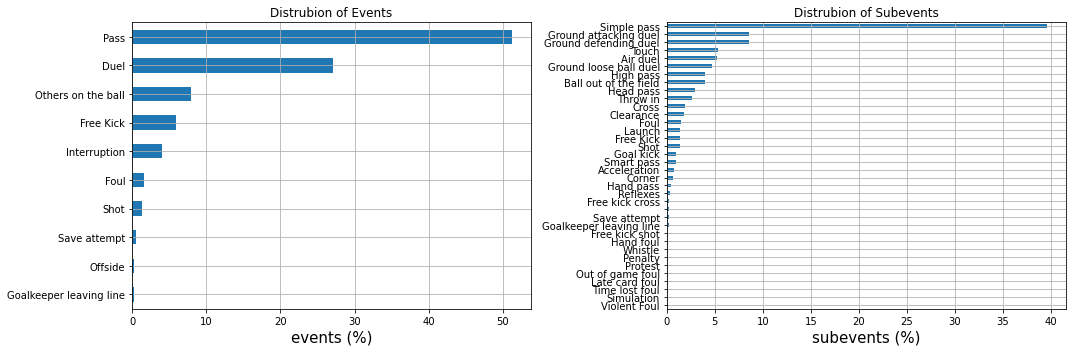

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
(count_events/count_events.sum() * 100).sort_values().plot(kind='barh', title='Distrubion of Events', ax=ax[0])
(count_subevents/count_subevents.sum() * 100).sort_values().plot(kind='barh', title='Distrubion of Subevents', ax=ax[1])

ax[0].grid()
ax[0].set_xlabel('events (%)', fontsize=15)
ax[0].set_ylabel('', fontsize=15)

ax[1].grid()
ax[1].set_xlabel('subevents (%)', fontsize=15)
ax[1].set_ylabel('', fontsize=15)

plt.tight_layout()
plt.savefig('figures/eventdistribtuion.png')
plt.show()

### Volume of events per match

In [6]:
event_frequency_per_match = allEvents.groupby(allEvents['matchId']).count().iloc[:, 0].reset_index().drop(columns='matchId')

<Figure size 432x288 with 0 Axes>

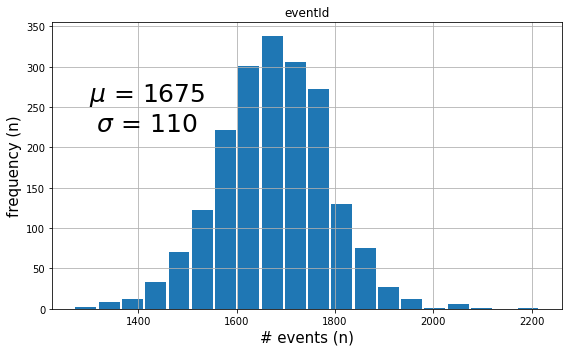

In [18]:
plt.figure()
event_frequency_per_match.hist(bins = 20, rwidth=0.9, figsize=(8, 5))
plt.text(1300,220, '$\mu$ = %i \n $\sigma$ = %i'%(event_frequency_per_match.mean(), event_frequency_per_match.std()), fontsize=25)
plt.ylabel('frequency (n)', fontsize=15)
plt.xlabel('# events (n)', fontsize=15)
plt.tight_layout()
plt.savefig('figures/eventspermatch.png')
plt.show()

## Spatial Information

### Events Map

In [4]:
for match in matches['Spain']:
    if '676' in match['teamsData'].keys(): #Is Barca playing?
        print(match)
        

{'status': 'Played', 'roundId': 4406122, 'gameweek': 38, 'teamsData': {'676': {'scoreET': 0, 'coachId': 92894, 'side': 'home', 'teamId': 676, 'score': 1, 'scoreP': 0, 'hasFormation': 1, 'formation': {'bench': [{'playerId': 211885, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 4256, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 25701, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 33, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 3291, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 3359, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 8323, 'ownGoals': '2', 'redCards': '0', 'goals': '0', 'yellowCards': '0'}], 'lineup': [{'playerId': 286390, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 3802, 'ownGoals': '0', 'redCards': '0

In [10]:
for match in matches['Spain']:
    if 2565884 == match['wyId']: #barca levante match
        print(match)
        break
        

{'status': 'Played', 'roundId': 4406122, 'gameweek': 34, 'teamsData': {'676': {'scoreET': 0, 'coachId': 92894, 'side': 'home', 'teamId': 676, 'score': 5, 'scoreP': 0, 'hasFormation': 1, 'formation': {'bench': [{'playerId': 3291, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 15008, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 211885, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 3269, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 3476, 'ownGoals': '2', 'redCards': '0', 'goals': '0', 'yellowCards': '0'}, {'playerId': 256634, 'ownGoals': '2', 'redCards': '0', 'goals': '0', 'yellowCards': '0'}, {'playerId': 7972, 'ownGoals': '2', 'redCards': '0', 'goals': '0', 'yellowCards': '0'}], 'lineup': [{'playerId': 3353, 'ownGoals': '2', 'redCards': '0', 'goals': '0', 'yellowCards': '0'}, {'playerId': 3346, 'ownGoals': '2', 'redCards': '0', 'goa

In [6]:
for team in teams:
    if 'barcelona' in team['name'].lower():
        print(team)

{'city': 'Barcelona', 'name': 'Barcelona', 'wyId': 676, 'officialName': 'FC Barcelona', 'area': {'name': 'Spain', 'id': '724', 'alpha3code': 'ESP', 'alpha2code': 'ES'}, 'type': 'club'}


In [7]:
match_id = 2565884 #Specific Barca macth I filtered out
df_match = allEvents.loc[allEvents['matchId']==match_id]
team1, team2 = df_match['teamId'].unique()
df_match['init_x'] = [pos[0]['x'] for pos in df_match['positions']]
df_match['init_y'] = [pos[0]['y'] for pos in df_match['positions']]

df_team1 = df_match[df_match['teamId'] == team1]
df_team2 = df_match[df_match['teamId'] == team2]

<ipython-input-7-82e172bb085d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match['init_x'] = [pos[0]['x'] for pos in df_match['positions']]
<ipython-input-7-82e172bb085d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match['init_y'] = [pos[0]['y'] for pos in df_match['positions']]


In [8]:
from helpers import *


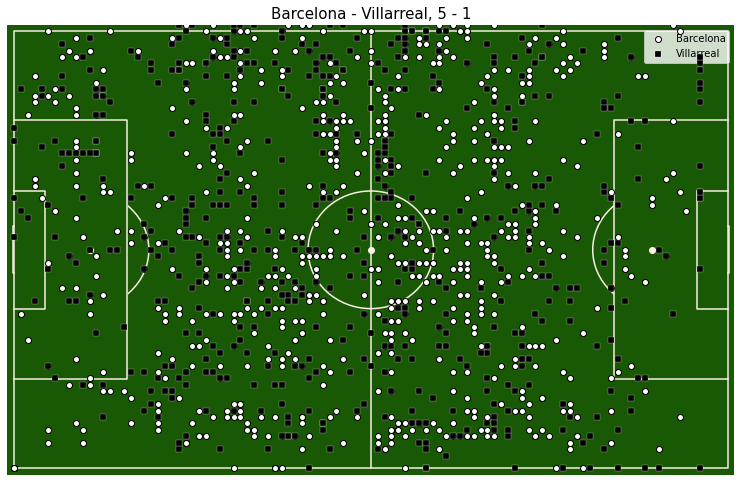

In [18]:
f = draw_pitch("#195905", "#faf0e6", "h", "full")
t1 = plt.scatter(df_team1['init_x'], df_team1['init_y'], c='w', edgecolors="k", zorder=12)
t2 = plt.scatter(df_team2['init_x'], df_team2['init_y'], marker='s', c='k', edgecolors="w", linewidth=0.25, zorder=12)
plt.title(match['label'], fontsize=15)
plt.legend([t1, t2], ['Barcelona', 'Villarreal'])
plt.tight_layout()
plt.savefig('figures/EventMap.png')
plt.show()

### Kernel Density Plot

In [19]:
position_ev = []
for nation in nations:
    for ev in events[nation]:
        position_ev.append([ev['eventName'],ev['positions'][0]['x'],ev['positions'][0]['y']]) #init positions

df_pos_ev = pd.DataFrame(position_ev, columns=['eventName','x','y'])

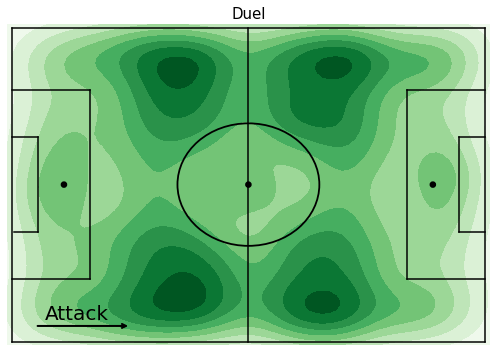

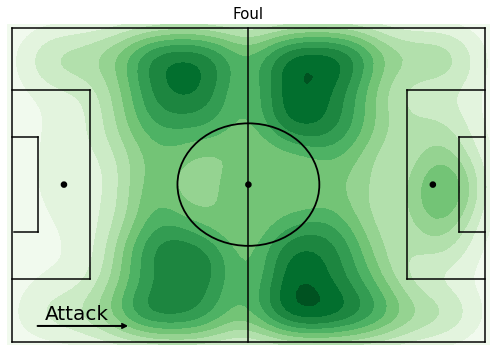

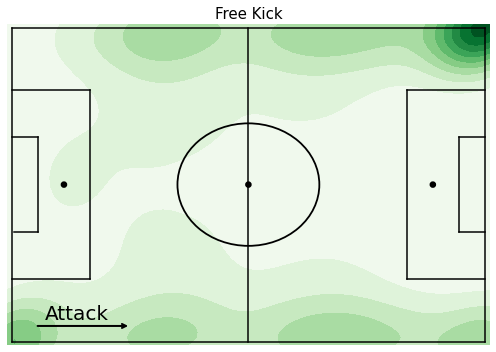

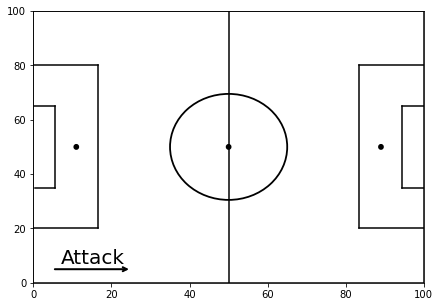

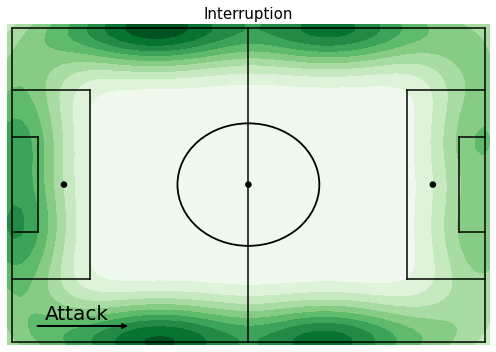

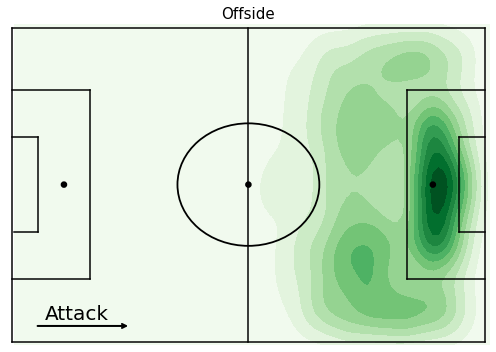

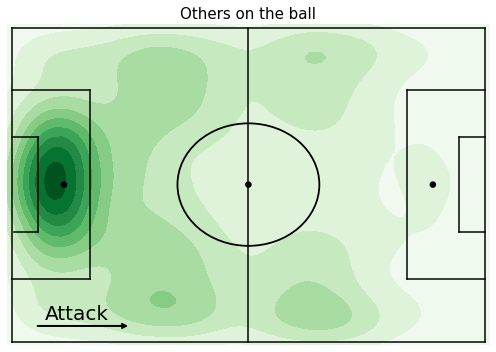

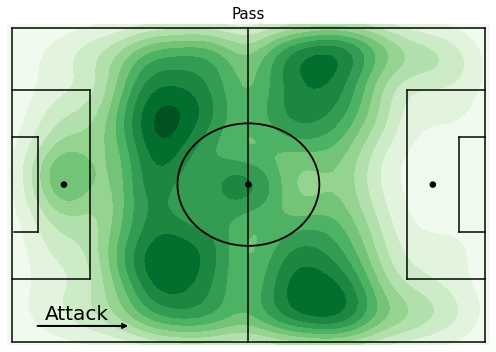

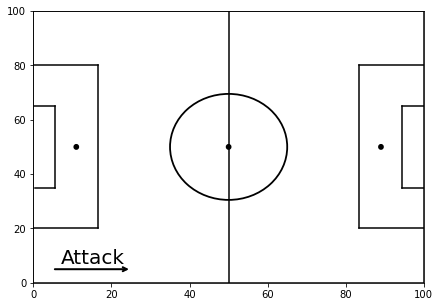

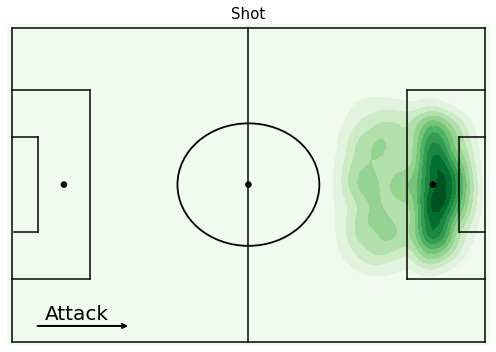

In [29]:
sample_size = 10000

for event in np.unique(df_pos_ev['eventName']):
    try:
        df_pos_event = df_pos_ev[df_pos_ev['eventName'] == event]
        fig,ax = pitch()
        if len(df_pos_event) >= 10000:
            x_y = df_pos_event[['x','y']].sample(sample_size).astype(float)
        else:
            x_y = df_pos_event[['x','y']].astype(float)
        sns.kdeplot(x_y['x'],x_y['y'], cmap = 'Greens', shade = True)
        plt.title(event, fontsize = 15)
        plt.xlim(-1,101)
        plt.ylim(-1,101)
        plt.axis('off')
        fig.tight_layout()
        plt.savefig('figures/kde_{}.png'.format(event))
        plt.show()
    except:
        pass

## Temporal Information

### Event Distribution , Club & International

In [37]:
nations_international = ['European_Championship','World_Cup']

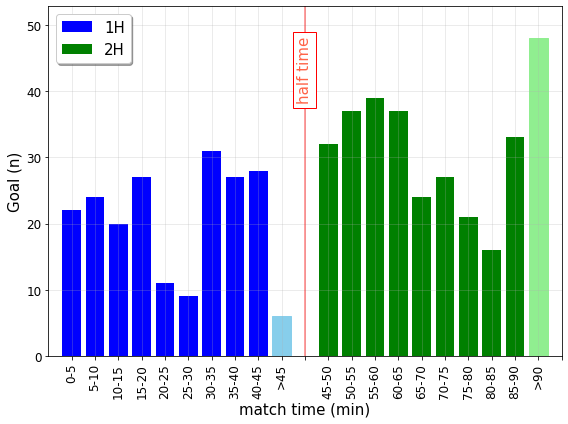

In [57]:
event_name = 'Goal'; event_tag = 101

event_time = []
for nation in nations:
    if nation in nations_international:
        for ev in events[nation]:
            for i in range(len(ev['tags'])):
                if ev['tags'][i]['id'] == event_tag:
                    event_time.append([ev['matchId'],ev['matchPeriod'],ev['eventSec']])
                else:
                    pass

df_event = pd.DataFrame(event_time, columns=['matchId','matchPeriod','eventSec'])


f, ax = plt.subplots(figsize=(8,6))
start_bin_label = 1
max_bin_count = 0

for half,color_bar,color_last_bar in zip(['1H','2H'],['b','g'],['skyblue','lightgreen']):
    df_half = df_event[df_event['matchPeriod'] == half].sort_values(['matchPeriod','eventSec'])
    bins = range(0,int(df_half['eventSec'].max())+1)[::300]
    labels = range(start_bin_label,start_bin_label+len(bins)-1)
    df_half['binned'] = pd.cut(df_half['eventSec'], bins=bins, labels=labels)
    df_half = df_half.sort_values('binned')
    barlist = plt.bar(Counter(df_half.binned.dropna()).keys(),Counter(df_half.binned.dropna()).values(),label=half,color=color_bar)
    if len(bins) == 11:
        barlist = barlist[len(bins)-2].set_color(color_last_bar)
    max_bin_half = np.max(list(Counter(df_half.binned.dropna()).values()))
    if max_bin_half > max_bin_count:
        max_bin_count = max_bin_half
    start_bin_label = 12
plt.legend(fontsize=15,frameon=True,shadow=True)
plt.xticks(list(range(1,23)),['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','>45','',
                              '45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','>90'],
          rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,max_bin_count+(max_bin_count/100*10))
plt.xlim(0,22)
plt.text(10.65,max_bin_count-(max_bin_count/100*10),'half time',rotation=90,bbox=dict(facecolor='w',edgecolor='r'),
         verticalalignment='center',horizontalalignment='left',fontsize=15,color='tomato')
plt.vlines(11,0,max_bin_count+(max_bin_count/100*10),colors='r',alpha=0.5)
plt.xlabel('match time (min)', fontsize=15)
plt.ylabel('%s (n)'%event_name, fontsize=15)
plt.grid(alpha=0.3)
f.tight_layout()
plt.savefig('temporal_distribution_{}_international.png'.format(event_name))
plt.show()

## In Match Squad Information

### Lineup

In [97]:
squad = pd.concat([pd.json_normalize(match['teamsData']['676']['formation']['bench']),
                    pd.json_normalize(match['teamsData']['676']['formation']['lineup'])], axis=0, keys={'Bench', 'OnField'})

In [98]:
squad

playerId ownGoals redCards goals yellowCards
OnField 0       3291        0        0  null           0
        1      15008        0        0  null           0
        2     211885        0        0  null           0
        3       3269        0        0  null           0
        4       3476        2        0     0           0
        5     256634        2        0     0           0
        6       7972        2        0     0           0
Bench   0       3353        2        0     0           0
        1       3346        2        0     0           0
        2       3341        2        0     0           0
        3       3802        2        0     1           0
        4     222770        2        0     0           0
        5     286390        2        0     2           0
        6       3359        2        0     1           0
        7       7860        2        0     0           0
        8      25701        2        0     0           0
        9      40550        2        0     1           0
        10        33        2        0     0           0

In [102]:
#squad = squad.droplevel(1)
squad['ownGoals'] = 0
squad['startingStatus'] = squad.index
squad['startingStatus'] = squad['startingStatus'].replace({'OnField': 'Bench', 'Bench':'OnField'})
squad

,playerId,ownGoals,redCards,goals,yellowCards,startingStatus
OnField,3291,0,0,null,0,Bench
OnField,15008,0,0,null,0,Bench
OnField,211885,0,0,null,0,Bench
OnField,3269,0,0,null,0,Bench
OnField,3476,0,0,0,0,Bench
OnField,256634,0,0,0,0,Bench
OnField,7972,0,0,0,0,Bench
Bench,3353,0,0,0,0,OnField
Bench,3346,0,0,0,0,OnField
Bench,3341,0,0,0,0,OnField


In [77]:
players={}
with open('./DataJson/players.json') as json_data:
    players = json.load(json_data)

players = pd.json_normalize(players)


In [82]:
players = players[['weight', 'shortName', 'height', 'foot', 'wyId', 'birthDate', 'role.name']]
players

,weight,shortName,height,foot,wyId,birthDate,role.name
0,78,H. Tekin,187,right,32777,1989-06-17,Goalkeeper
1,73,M. Sarr,182,left,393228,1999-01-23,Defender
2,72,O. Mandanda,176,,393230,1998-10-26,Goalkeeper
3,82,A. N'Diaye,187,right,32793,1990-03-06,Midfielder
4,84,I. Konat\u00e9,192,right,393247,1999-05-25,Defender
...,...,...,...,...,...,...,...
3598,72,A. Ma\u00e2loul,175,left,120839,1990-01-01,Defender
3599,76,C. C\u00e1ceda,183,right,114736,1991-09-27,Goalkeeper
3600,78,M. Araujo,179,right,114908,1994-10-24,Defender
3601,70,A. Tagnaouti,182,right,285583,1996-04-05,Goalkeeper


In [83]:
players

,weight,shortName,height,foot,wyId,birthDate,role.name
0,78,H. Tekin,187,right,32777,1989-06-17,Goalkeeper
1,73,M. Sarr,182,left,393228,1999-01-23,Defender
2,72,O. Mandanda,176,,393230,1998-10-26,Goalkeeper
3,82,A. N'Diaye,187,right,32793,1990-03-06,Midfielder
4,84,I. Konat\u00e9,192,right,393247,1999-05-25,Defender
...,...,...,...,...,...,...,...
3598,72,A. Ma\u00e2loul,175,left,120839,1990-01-01,Defender
3599,76,C. C\u00e1ceda,183,right,114736,1991-09-27,Goalkeeper
3600,78,M. Araujo,179,right,114908,1994-10-24,Defender
3601,70,A. Tagnaouti,182,right,285583,1996-04-05,Goalkeeper


In [105]:
squad.merge(players, left_on='playerId', right_on='wyId').drop(columns=['wyId',
                                                                       'playerId']).sort_index(axis=1)

,birthDate,foot,goals,height,ownGoals,redCards,role.name,shortName,startingStatus,weight,yellowCards
0,1993-08-30,right,null,175,0,0,Forward,Paco Alc\u00e1cer,Bench,71,0
1,1992-04-30,right,null,187,0,0,Goalkeeper,M. ter Stegen,Bench,85,0
2,1993-07-30,right,null,188,0,0,Midfielder,Andr\u00e9 Gomes,Bench,84,0
3,1989-03-21,left,null,170,0,0,Defender,Jordi Alba,Bench,68,0
4,1988-03-10,right,0,184,0,0,Midfielder,I. Rakiti\u0107,Bench,78,0
5,1994-09-23,right,0,195,0,0,Defender,Y. Mina,Bench,75,0
6,1987-01-24,right,0,182,0,0,Forward,L. Su\u00e1rez,Bench,86,0
7,1984-05-11,right,0,171,0,0,Midfielder,Iniesta,OnField,68,0
8,1988-07-16,right,0,189,0,0,Midfielder,Sergio Busquets,OnField,76,0
9,1987-02-02,right,0,194,0,0,Defender,Piqu\u00e9,OnField,85,0


### Subs

In [108]:
subs = pd.json_normalize(match['teamsData']['676']['formation']['substitutions'])

In [117]:
subs['playerInName'] = subs['playerIn'].apply(lambda x: players.loc[players['wyId']==x, 'shortName'].values[0])
subs['playerOutName'] = subs['playerOut'].apply(lambda x: players.loc[players['wyId']==x, 'shortName'].values[0])

In [118]:
subs.sort_index(axis=1)

,minute,playerIn,playerInName,playerOut,playerOutName
0,61,7972,L. Su\u00e1rez,3353,Iniesta
1,65,3476,I. Rakiti\u0107,3346,Sergio Busquets
2,80,256634,Y. Mina,3341,Piqu\u00e9
